# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

In order to carry out the analysis, we will have to take a number of steps prior to performing our statistical tests.

These are:

- Fixing and enriching the data
    - Changing datatypes, removing duplicates and entries that aren't appropriate for analysis

- Aggregating the data
    - Combining the data for calls, messages and internet usage each month into one dataframe
    
- Studying user behaviour
    - Performing some data analysis and visualisation to observe any patterns.
    
- Finally, performing statistical test to determine if differences are statistically significant.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import statistics
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore") 

## Load data

In [2]:
# Loading the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv') 
plans_df = pd.read_csv('/datasets/megaline_plans.csv') 
users_df = pd.read_csv('/datasets/megaline_users.csv')


In [3]:
#setting view options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Prepare the data

We'll check DataFrames one by one identifying any erroneous data types, duplicates or missing values and correcting them accordingly.

## Plans

In [4]:
# Printing the general/summary information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The data allowance is given in Mb yet data is excess data is charged per Gb. This is something to be careful of going forward.

## Users

In [6]:
# Printing the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Printing a sample of data for users
users_df.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22
48,1048,Linwood,Terrell,42,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-24,surf,NaN
76,1076,Ronny,Browning,51,"Buffalo-Cheektowaga, NY MSA",2018-07-29,surf,NaN
147,1147,Duncan,Malone,71,"Urban Honolulu, HI MSA",2018-04-30,surf,NaN
160,1160,Steven,Morgan,44,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-02-05,surf,NaN
231,1231,Gaylord,Witt,57,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-01-19,ultimate,NaN
201,1201,Jeanelle,Estrada,61,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-04,surf,NaN
263,1263,Lucio,Duffy,39,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,surf,NaN
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,NaN
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaN


In [8]:
#checking for duplicates
users_df.duplicated().sum()

0

In [9]:
#checking earliest/latest registrations
print(users_df['reg_date'].min())
print(users_df['reg_date'].max())

2018-01-01
2018-12-31


We're only interested in data from 2018 and, from the project description, we know that those with NaN values for churn date are still using the plan, so we can set a churn date of 2018-12-31. Then convert `reg_date` and `churn_date` to a datetime object.

Care needs to be taken to avoid calculating revenue before the registration date or after the churn date. We also don't want to be calculating monthly revenue for users who signed up or terminated part way through a month therefore, throughout the analysis we will only concern ourselves with 'whole' months of users plans, i.e where they were signed up on or before the first of the month and didn't terminate their plan before the end of the month.

We can use the `.day` and  `.month` attributes to calculate the users first and last 'full' month and add these to the DataFrame.

### Fix Data

`reg_date` can be changed to a datetime object.
As we are only interested in 2018, we can set the churn date for NaN users to 31-12-2018.

In [10]:
users_df['churn_date'].fillna('2018-12-31', inplace = True)
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31


In [11]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format = '%Y-%m-%d')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

We can note the users first full month and remove those who signed up less than a month before the end of 2018.


If users signed up on the 1st day of the month we will count that as their first month, otherwise, their first month will be listed as the first full month after their sign-up date.

We can do similarto identify users last full month.

In [12]:
#creating function to identify first full month

def first_month(dt):
    if dt.day == 1:
        return dt.month
    else:
        return dt.month + 1
    
users_df['first_month'] = users_df['reg_date'].apply(first_month)

#removing users who signed up less than a month before the end of 2018
users_df = users_df[users_df['first_month']!= 13]

users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,first_month
240,1240,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,surf,2018-12-31,4
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,10
139,1139,Thomas,Lawson,66,"New Orleans-Metairie, LA MSA",2018-11-18,surf,2018-12-31,12
382,1382,Luci,Kidd,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-06-22,ultimate,2018-12-31,7
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,2018-12-31,8
228,1228,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,2018-12-31,5
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,2018-12-31,4
488,1488,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf,2018-12-31,6
235,1235,Felton,Nguyen,50,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-20,surf,2018-12-31,3
415,1415,Rosette,Mendez,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-27,surf,2018-12-31,3


In [13]:
#creating function to identify last full month
def last_month(dt):
    if dt.is_month_end:
        return dt.month
    else:
        return dt.month -1
    
users_df['last_month'] = users_df['churn_date'].apply(last_month)

users_df.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,first_month,last_month
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,2018-12-31,4,12
164,1164,Kam,Macias,31,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-17,ultimate,2018-12-31,3,12
39,1039,Flo,Hicks,56,"Columbus, OH MSA",2018-05-30,ultimate,2018-12-31,6,12
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,2018-12-31,5,12
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,2018-12-31,3,12
123,1123,Dierdre,Nash,66,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-04-19,surf,2018-12-31,5,12
419,1419,Bryon,Gordon,45,"Phoenix-Mesa-Chandler, AZ MSA",2018-03-29,surf,2018-12-31,4,12
426,1426,Lamont,Conner,44,"San Francisco-Oakland-Berkeley, CA MSA",2018-07-09,ultimate,2018-12-31,8,12
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,2018-12-31,3,12
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,2018-12-31,12,12


There may be some users who subscribed to a service for less than a month, we can remove these from the dataframe

In [14]:
users_df = users_df[users_df['last_month'] - users_df['first_month']>=0]
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      462 non-null    int64         
 1   first_name   462 non-null    object        
 2   last_name    462 non-null    object        
 3   age          462 non-null    int64         
 4   city         462 non-null    object        
 5   reg_date     462 non-null    datetime64[ns]
 6   plan         462 non-null    object        
 7   churn_date   462 non-null    datetime64[ns]
 8   first_month  462 non-null    int64         
 9   last_month   462 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 39.7+ KB


We've removed 38 users from our DataFrame who don't have at least one full month of data from 2018.

## Calls

In [15]:
# Printing the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
calls_df.sample(20)

,id,user_id,call_date,duration
11159,1049_326,1049,2018-08-16,0.00
58743,1212_226,1212,2018-08-28,0.00
31400,1118_38,1118,2018-12-29,2.89
104343,1368_13,1368,2018-10-31,11.83
51026,1185_64,1185,2018-03-26,10.84
116573,1408_222,1408,2018-04-20,6.90
113143,1397_940,1397,2018-12-27,9.13
6471,1031_55,1031,2018-11-25,10.42
71311,1254_163,1254,2018-10-29,1.26
51655,1185_693,1185,2018-04-23,0.00


In [17]:
calls_df.duplicated().sum()

0

We can see some unconnected calls with a `duration` of 0.00. As users won't be charged for these we can remove these from the DataFrame. 

We'll also need to convert `call_date` to a datetime object.

In the project description it is explained that the length of a call is always rounded up to the nearest minute. We can create a new column  with the rounded duration.

### Fix data

In [18]:
#converting date to datetime and removing unconnected calls
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format = '%Y-%m-%d')
calls_df = calls_df[calls_df['duration'] != 0.00]

calls_df.describe()

,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


### Enrich data

In [19]:
#adding rounded duration column
calls_df['duration_rounded'] = calls_df['duration'].apply(math.ceil)
calls_df.head()

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


## Messages

In [20]:
# Printing the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# Print a sample of data for messages

messages_df.sample(20)

,id,user_id,message_date
45284,1304_269,1304,2018-11-13
21388,1132_704,1132,2018-06-28
57155,1362_226,1362,2018-04-10
31829,1196_315,1196,2018-04-10
24655,1146_198,1146,2018-11-23
32818,1204_13,1204,2018-12-21
75583,1491_492,1491,2018-09-28
19361,1125_29,1125,2018-12-26
69165,1448_401,1448,2018-12-18
10817,1077_88,1077,2018-03-25


In [22]:
messages_df.duplicated().sum()

0

Again, we convert message date to a datetime object.

### Fix data

We can convert message_date to a datetime object.

In [23]:
#converting message date to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format = '%Y-%m-%d')
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [24]:
# Printing the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Printing a sample of data for the internet traffic
internet_df.sample(20)

,id,user_id,session_date,mb_used
6018,1033_79,1033,2018-10-21,0.00
14556,1066_450,1066,2018-09-16,337.10
64605,1296_142,1296,2018-12-13,324.76
38609,1173_47,1173,2018-10-17,105.93
52701,1237_81,1237,2018-09-04,0.00
62810,1289_188,1289,2018-12-23,160.60
14067,1065_163,1065,2018-11-07,464.03
20716,1095_417,1095,2018-05-21,482.87
44371,1196_380,1196,2018-04-05,874.98
35364,1160_68,1160,2018-07-09,135.10


In [26]:
#checking for duplicates
internet_df.duplicated().sum()

0

Once again we need to convert a date to a datetime object.

There are some enties with 0.00Mb used with can be dropped.

### Fix data

In [27]:
#converting to datetime object and removing sessions with no data used.
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d')
internet_df = internet_df[internet_df['mb_used'] != 0.00]
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


## Study plan conditions

Before we aggregate data, it's important to recheck the plan conditions.

In [28]:
# Printing out the plan conditions
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now that data is cleaned we can aggregate it.



### Calls

We will denote each month by its numeric descriptor, i.e 'February' = 2.

We'll take calls from `calls_df` for each month, group them by user_id and check the count.

There will potentially be some records from before the users first full month and after their last full month, we will deal with these later.

In [29]:
# Calculating the number of calls made by each user per month
calls_per_user = pd.DataFrame(users_df['user_id'])
calls_per_user.set_index('user_id', inplace = True)

for month in list(range(1,13)):
    calls_per_user[month] = calls_df[pd.DatetimeIndex(calls_df["call_date"]).month == month].groupby('user_id')['id'].count()

calls_per_user.fillna(0, inplace = True)

calls_per_user = calls_per_user.astype('int')

calls_per_user.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1493,0,0,0,0,0,0,0,42,51,52,59,59
1479,0,0,0,0,0,0,0,0,0,0,66,116
1205,0,0,0,0,0,0,0,0,0,0,28,48
1442,0,0,0,0,0,0,0,0,0,0,0,26
1320,0,0,0,53,99,105,100,97,96,91,113,113
1427,0,0,0,0,31,31,35,36,35,30,39,46
1119,0,0,0,0,0,0,0,0,0,41,52,57
1477,0,0,0,0,0,0,0,0,0,9,38,40
1309,0,0,0,0,0,0,0,0,0,0,3,69


### Minutes
We can do something similar for minutes used by users each month, this time using the sum of `duration_rounded` per month.

In [30]:
# Calculating the amount of minutes spent by each user per month. Save the result.

minutes_per_user = pd.DataFrame(users_df['user_id'])
minutes_per_user.set_index('user_id', inplace = True)

for month in list(range(1,13)):
    minutes_per_user[month] = calls_df[pd.DatetimeIndex(calls_df["call_date"]).month == month].groupby('user_id')['duration_rounded'].sum()

minutes_per_user.fillna(0, inplace = True)

minutes_per_user = minutes_per_user.astype('int')

minutes_per_user.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2.554113,11.893939,24.331169,53.357143,92.097403,128.292208,172.391775,208.571429,255.380952,323.077922,380.822511,455.032468
std,25.285019,77.169866,102.163689,150.464848,202.642845,224.524156,267.796796,264.550202,269.416140,275.470409,258.978602,264.717639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.500000,286.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.500000,317.000000,392.500000,442.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,223.250000,349.250000,396.500000,461.500000,515.750000,562.000000,609.750000
max,292.000000,811.000000,788.000000,1043.000000,1055.000000,1033.000000,1188.000000,1292.000000,1232.000000,1227.000000,1304.000000,1510.000000


In [31]:
minutes_per_user.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1065,0,0,0,0,0,0,0,0,211,723,626,469
1401,0,0,0,0,0,0,0,77,647,466,685,635
1248,0,0,0,0,0,0,0,0,0,0,99,966
1405,0,0,0,0,0,101,185,119,166,185,165,143
1199,0,0,0,0,0,0,0,394,434,542,609,436
1074,0,0,0,0,0,0,0,0,0,0,105,618
1291,0,0,0,79,558,671,642,472,614,681,517,626
1152,0,0,0,0,0,0,0,0,0,0,639,741
1159,0,0,0,0,0,0,0,742,806,848,856,1071


### Messages
For each month, we'll group by user_id and count the number of messages

In [32]:
# Calculating the number of messages sent by each user per month
messages_per_user = pd.DataFrame(users_df['user_id'])
messages_per_user.set_index('user_id', inplace = True)

for month in list(range(1,13)):
    messages_per_user[month] = messages_df[pd.DatetimeIndex(messages_df["message_date"]).month == month].groupby('user_id')['id'].count()

messages_per_user.fillna(0, inplace = True)

messages_per_user = messages_per_user.astype('int')

messages_per_user.describe()


,1,2,3,4,5,6,7,8,9,10,11,12
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.179654,0.560606,1.285714,2.885281,6.017316,8.296537,11.272727,16.004329,19.971861,26.337662,30.326840,38.813853
std,2.247239,4.741885,7.265687,11.115731,18.528975,20.725788,23.743369,28.347395,29.672129,34.350728,33.421701,38.807160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,24.000000,31.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.750000,23.000000,32.750000,41.750000,47.750000,61.000000
max,37.000000,67.000000,72.000000,120.000000,149.000000,143.000000,164.000000,156.000000,155.000000,224.000000,180.000000,266.000000


In [33]:
messages_per_user.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1023,0,0,0,0,0,0,5,6,0,0,0,0
1435,0,0,0,0,0,0,0,0,69,128,125,150
1283,0,0,0,0,0,0,0,0,0,0,11,117
1441,0,0,0,0,0,0,0,0,0,0,7,15
1406,0,0,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,0,0
1381,0,0,0,0,0,0,0,0,63,224,180,157
1154,0,0,0,0,0,0,0,0,0,74,68,83
1009,0,0,0,0,0,0,0,0,0,0,0,0


### Internet
Similar for data. This will be measured in Mb, we will convert to Gb and round up when we're calculating revenue.

In [34]:
# Calculating the volume of internet traffic used by each user per month

mb_per_user = pd.DataFrame(users_df['user_id'])
mb_per_user.set_index('user_id', inplace = True)

for month in list(range(1,13)):
    mb_per_user[month] = internet_df[pd.DatetimeIndex(internet_df["session_date"]).month == month].groupby('user_id')['mb_used'].sum()

mb_per_user.fillna(0, inplace = True)


mb_per_user.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,81.000195,496.777597,1140.266970,2029.794156,3366.253939,4773.010000,6483.020758,8627.032056,10125.858117,12885.485281,14651.517706,17612.847944
std,811.203317,2889.862905,4788.111345,5779.277701,7214.866632,8236.270786,9563.049445,10424.133369,9868.674108,10168.045386,8878.278791,8959.390747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8955.597500,13129.310000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10199.535000,14340.755000,15526.670000,17440.890000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,8448.180000,14293.367500,17381.810000,17639.557500,19854.685000,20079.872500,21952.375000
max,10635.640000,21598.950000,36061.040000,37761.590000,36672.290000,37907.140000,38929.090000,51809.350000,37587.030000,46868.750000,42952.590000,70931.590000


In [35]:
mb_per_user.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1321,0.0,0.0,0.0,0.0,0.0,17726.98,23604.01,19672.55,18633.06,22575.28,11822.98,23318.65
1019,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,3012.91,28127.77
1048,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2256.76,8806.79,12249.23,10699.55,9290.36
1177,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,11670.71,25912.86
1068,0.0,0.0,0.0,0.0,6540.1,15171.84,14329.65,14672.28,11973.64,19290.34,13994.14,17421.53
1478,0.0,0.0,0.0,0.0,0.0,0.00,0.00,12170.58,19428.57,12314.99,16216.44,22560.06
1238,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22351.40,22777.73
1250,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,8511.32,11680.55,8733.20
1114,0.0,0.0,0.0,0.0,0.0,0.00,7572.63,21360.40,12680.13,15846.17,26829.87,18058.14



### Merging data

We can use to multi-indexing to create a hierarchical structure, with month on the highest level, followed by data for calls, minutes used, messages and data.

We will add in a placeholder `revenue` column per month to be filled in later.

In [36]:
# Merging the data for calls, minutes, messages, internet based on user_id and month
mux = pd.MultiIndex.from_product([list(range(1,13)), ['n_calls','n_mins', 'n_messages', 'n_mbs', 'revenue']])

agg_df = pd.DataFrame(columns = mux)
agg_df['user_id'] = users_df['user_id']
agg_df.set_index('user_id', inplace = True)



df_dict = {'n_calls': calls_per_user, 'n_mins' : minutes_per_user, 'n_messages' : messages_per_user, 'n_mbs' : mb_per_user}

for month in list(range(1,13)):
    for col in ['n_calls','n_mins', 'n_messages', 'n_mbs']:
        agg_df.loc[:, (month, col)] = df_dict[col][month] 



agg_df.sample(10)

1                                          2                     \
        n_calls n_mins n_messages    n_mbs revenue n_calls n_mins n_messages   
user_id                                                                        
1183          0      0          0     0.00     NaN       0      0          0   
1196         32    287         23  8908.61     NaN      63    519         23   
1391          0      0          0     0.00     NaN       0      0          0   
1126          0      0          0     0.00     NaN       0      0          0   
1352          0      0          0     0.00     NaN       0      0          0   
1258          0      0          0     0.00     NaN       0      0          0   
1087          0      0          0     0.00     NaN       0      0          0   
1405          0      0          0     0.00     NaN       0      0          0   
1047          0      0          0     0.00     NaN       0      0          0   
1450          0      0          0     0.00     NaN       0      0          0   

                              3                                           4   \
           n_mbs revenue n_calls n_mins n_messages     n_mbs revenue n_calls   
user_id                                                                        
1183         0.0     NaN       0      0          0      0.00     NaN       0   
1196     20085.2     NaN      79    614         26  30960.95     NaN      59   
1391         0.0     NaN       0      0          0      0.00     NaN       0   
1126         0.0     NaN       0      0          0      0.00     NaN       0   
1352         0.0     NaN       0      0          0      0.00     NaN       0   
1258         0.0     NaN       0      0          0      0.00     NaN       0   
1087         0.0     NaN       0      0          0      0.00     NaN       0   
1405         0.0     NaN       0      0          0      0.00     NaN       0   
1047         0.0     NaN       0      0          0      0.00     NaN       0   
1450         0.0     NaN       0      0          0      0.00     NaN       0   

                                                 5                     \
        n_mins n_messages     n_mbs revenue n_calls n_mins n_messages   
user_id                                                                 
1183         0          0      0.00     NaN       0      0          0   
1196       493         30  23851.24     NaN      50    431         30   
1391         0          0      0.00     NaN       0      0          0   
1126         0          0      0.00     NaN       0      0          0   
1352         0          0      0.00     NaN       0      0          0   
1258         0          0      0.00     NaN       0      0          0   
1087         0          0      0.00     NaN       0      0          0   
1405         0          0      0.00     NaN       0      0          0   
1047         0          0      0.00     NaN       0      0          0   
1450         0          0      0.00     NaN       0      0          0   

                               6                                           7   \
            n_mbs revenue n_calls n_mins n_messages     n_mbs revenue n_calls   
user_id                                                                         
1183         0.00     NaN       0      0          0      0.00     NaN       0   
1196     23429.34     NaN      69    648         34  24669.37     NaN      67   
1391         0.00     NaN       0      0          0      0.00     NaN       0   
1126         0.00     NaN      91    797         78  27575.54     NaN     102   
1352         0.00     NaN       0      0          0      0.00     NaN       0   
1258         0.00     NaN       0      0          0      0.00     NaN       4   
1087         0.00     NaN       0      0          0      0.00     NaN       0   
1405         0.00     NaN      10    101         24   5066.43     NaN      18   
1047         0.00     NaN       0      0          0      0.00     NaN       0   
1450     

### Removing data for 'non-full' months


We do actually need some null values, a '0' for a user who had started a plan means something different to a '0' for a user who was yet to start a plan. 

The day within the month the user signed up also matters. A user who has only had an active plan for 5 days and used 5GB of data should be treated differently to a user who used 10GB in a whole month.

To improve analysis we will only use data from whole months of usage, i.e the start date is before or on the first of the month and the churn_date (if any) is on or after the last of the month.


We can find these using the `first_month` and `last_month` columns we added to user_df.

We'll replace values before the start month and after the last month with NaN.




In [37]:
#inserting null values before the start date and after the end date.

for user in users_df['user_id'].unique():
    first_month = int(users_df.loc[users_df.user_id == user, 'first_month'])
    last_month = int(users_df.loc[users_df.user_id == user, 'last_month'])
    
    
    for i in range(1,first_month):
        agg_df.loc[user, i] = np.nan
    
    if last_month < 12:
        for j in range(last_month + 1, 13):
            agg_df.loc[user, j] = np.nan


## Calculating revenue

We will first need to add the users plan type to our aggregated df.


Using that information we can check users' minutes used, messages sent and megabytes used, then see if these are greater than what is included in their plans. If they went over, we can calculate the additonal revenue.

In [38]:
#adding plan to aggregated df
for user in users_df['user_id'].unique():
    agg_df.loc[agg_df.index == user, 'plan'] = users_df.loc[users_df.user_id == user, 'plan'].item()
    
#users_df.loc[users_df.user_id == user, 'plan']

In [39]:
# Calculating the monthly revenue for each user

basic_cost = {'ultimate': 70, 'surf': 20}

plan_allowance = {'ultimate': {'mbs': 30720, 'mins' : 3000, 'msgs': 1000}, 
                 'surf': {'mbs': 15360, 'mins' : 500, 'msgs': 50}}
plan_extras = {'ultimate': {'gbs' : 7, 'mins': 0.01, 'msgs': 0.01},
               'surf': {'gbs' : 10, 'mins': 0.03, 'msgs': 0.03}}
               

               
for user in users_df['user_id'].unique():
    plan = agg_df.loc[user, 'plan'].item()
               
    for month in range(1,13):
        entry = agg_df.loc[user, month]
        
        #if any of mins, msgs, mbs is nan, users were not signed for that full month, therefore revenue is nan
        if True in np.isnan(list(entry)[:-1]):
            
            agg_df.loc[user, (month, 'revenue')] = np.nan
            
        else:
            cost = 0

            #adding base cost
            cost += basic_cost[plan]
            
            #checking internet usage
            
            used_mb = entry['n_mbs']
            allowed_mb = plan_allowance[plan]['mbs']

            if  used_mb > allowed_mb:
                   #excess is rounded up to the nearest Gb
                excess = math.ceil((used_mb - allowed_mb)/1024)

                cost += (excess * plan_extras[plan]['gbs'])
            
            #checking minutes used
            
            used_mins = entry['n_mins']
            allowed_mins = plan_allowance[plan]['mins']

            if used_mins > allowed_mins:
                excess = used_mins - allowed_mins

                cost+= excess * plan_extras[plan]['mins']

            #checking messages used
            
            used_msgs = entry['n_messages']      
            allowed_msgs = plan_allowance[plan]['msgs']


            if used_msgs > allowed_msgs:
                excess = used_msgs- allowed_msgs

                cost+= excess * plan_extras[plan]['msgs']

            #adding monthly revenue to dataframe
            agg_df.loc[user, (month, 'revenue')] = cost       

               
    
               
               


In [40]:
agg_df.head(20)

1                                       2                    \
        n_calls n_mins n_messages n_mbs revenue n_calls n_mins n_messages   
user_id                                                                     
1001        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1002        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1003        NaN    NaN        NaN   NaN     NaN     0.0    0.0        0.0   
1004        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1005        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1007        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1008        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1009        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1010        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1011        NaN    NaN        NaN   NaN     NaN     0.0    0.0        0.0   
1012        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1013        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1014        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1016        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1017        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1018        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1019        NaN    NaN        NaN   NaN     NaN     0.0    0.0        0.0   
1020        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1022        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   
1023        NaN    NaN        NaN   NaN     NaN     NaN    NaN        NaN   

                            3                                       4         \
        n_mbs revenue n_calls n_mins n_messages n_mbs revenue n_calls n_mins   
user_id                                                                        
1001      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1002      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1003      0.0      20     0.0    0.0        0.0   0.0      20     0.0    0.0   
1004      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1005      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1007      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1008      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1009      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1010      NaN     NaN     NaN    NaN        NaN   NaN     NaN    76.0  656.0   
1011      0.0      70     0.0    0.0        0.0   0.0      70     0.0    0.0   
1012      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1013      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1014      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1016      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1017      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1018      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1019      0.0      20     0.0    0.0        0.0   0.0      20     0.0    0.0   
1020      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1022      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   
1023      NaN     NaN     NaN    NaN        NaN   NaN     NaN     NaN    NaN   

                                           5                              \
        n_messages     n_mbs revenue n_calls n_mins n_messages     n_mbs   
user_id                                                                    
1001           NaN       NaN     NaN     NaN    NaN        NaN       NaN   
1002           NaN       NaN     NaN     NaN    NaN        NaN       NaN   
1003           0.0   

Looks complete. 

Interestingly there appear to be plenty of users who signed up but didn't use any of their allowance. This still produces revenue but might need to be considered when analysing other aspects of usage.

## Study user behaviour

We can look deeper into user behaviour by analysing typical calls, messages and internet usage per month per plan.

In [41]:
#creating different dataframes for those on different plans
surf_df = agg_df[agg_df['plan'] == 'surf']
ultimate_df = agg_df[agg_df['plan'] == 'ultimate']

In [42]:
#checking how many users on each plan
print(len(surf_df['plan']))
print(len(ultimate_df['plan']))

310
152


### Calls

We can start by analysing the average call length per month.

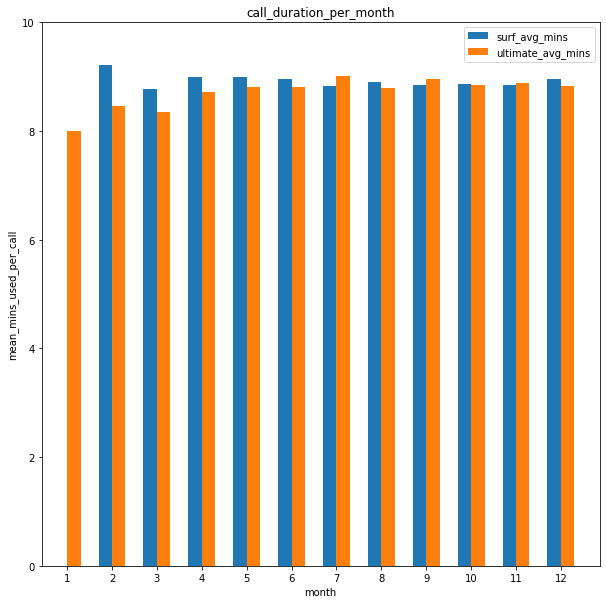

In [43]:
#collating monthly data
surf_avg_mins = []
for month in range(1,13):
    surf_avg_mins.append(surf_df[month]['n_mins'].sum()/surf_df[month]['n_calls'].sum())  



ultimate_avg_mins = []
for month in range(1,13):
    ultimate_avg_mins.append(ultimate_df[month]['n_mins'].sum()/ultimate_df[month]['n_calls'].sum()) 

# Position of bars on x-axis
ind = np.arange(12)

width = 0.3

plt.figure(figsize=(10,10))

# Plotting
plt.bar(ind, surf_avg_mins , width, label='surf_avg_mins')
plt.bar(ind + width, ultimate_avg_mins, width, label='ultimate_avg_mins')
plt.ylim(0,10)
plt.xlabel('month')
plt.ylabel('mean_mins_used_per_call')
plt.title('call_duration_per_month')

plt.xticks(ind + width / 2, (list(range(1,13))))

plt.legend(loc='best')
plt.show()

Although we don't have any data from January for the surf plan, it appears that the average call duration doesn't vary much month to month nor is there any obvious differences between different plans.

We can go onto investigate the number of minutes users are using each month.

For future analysis, when we are not comparing months but we want to compare monthly data. We can collate this into one list to aid with data visualisation. We can write a function to do just that.

In [44]:
def clean_list(df, cols):
    l = []
    for month in range(1,13):
        #collating into lsit of lists
        l.append(df[month][cols])
    
    #converting list of lists to one list
    l = [item for sublist in l for item in sublist]
    
    #removing nan values as these arestill counted in len function
    l =  [x for x in l if x == x]
    
    return l

<Figure size 432x288 with 0 Axes>

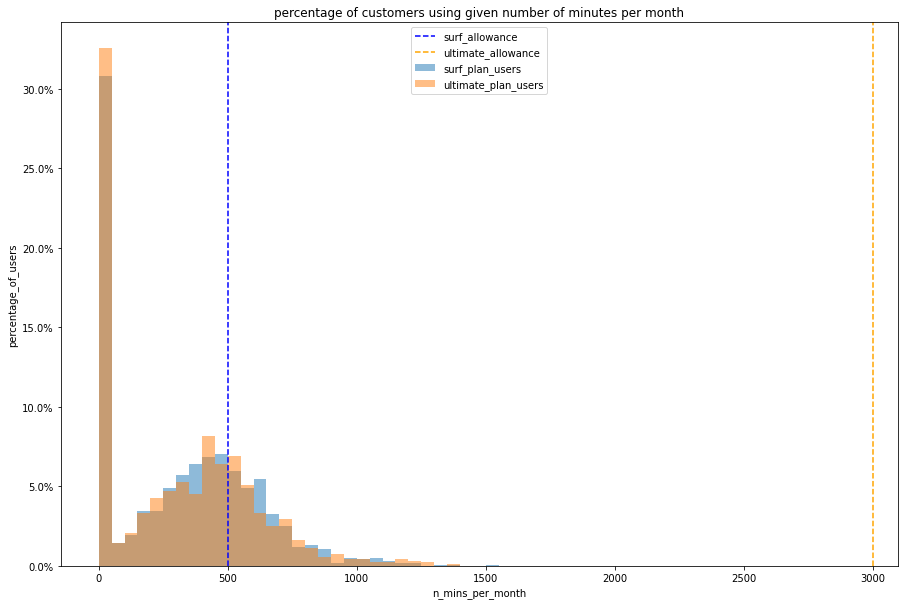

In [45]:
# Comparing the number of minutes users of each plan require each month
plt.clf()
surf_mins_list_clean = clean_list(surf_df, 'n_mins')
ultimate_mins_list_clean = clean_list(ultimate_df, 'n_mins')

#creating histogram, weights are added to convert data into percentages of their respective datasets
#this will make it easier to compare between datasets with unequal numbers of users
plt.figure(figsize=(15,10))
plt.hist(surf_mins_list_clean, weights= np.ones(len(surf_mins_list_clean)) / len(surf_mins_list_clean) , alpha = 0.5,bins= list(range(0,3000,50)), label='surf_plan_users')
plt.hist(ultimate_mins_list_clean, weights=np.ones(len(ultimate_mins_list_clean)) / len(ultimate_mins_list_clean) , alpha = 0.5, bins= list(range(0,3000,50)), label='ultimate_plan_users')

#adding formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_mins_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers using given number of minutes per month')

#adding lines at the plan allowances
plt.axvline(x = plan_allowance['surf']['mins'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axvline(x = plan_allowance['ultimate']['mins'], color = 'orange', linestyle='--', label = 'ultimate_allowance')


plt.legend(loc='best')
plt.show()

As previously observed, there are a lot of users who are using 0 minutes of their plan each month.
We can take a closer look at those who used at least 1 minute.

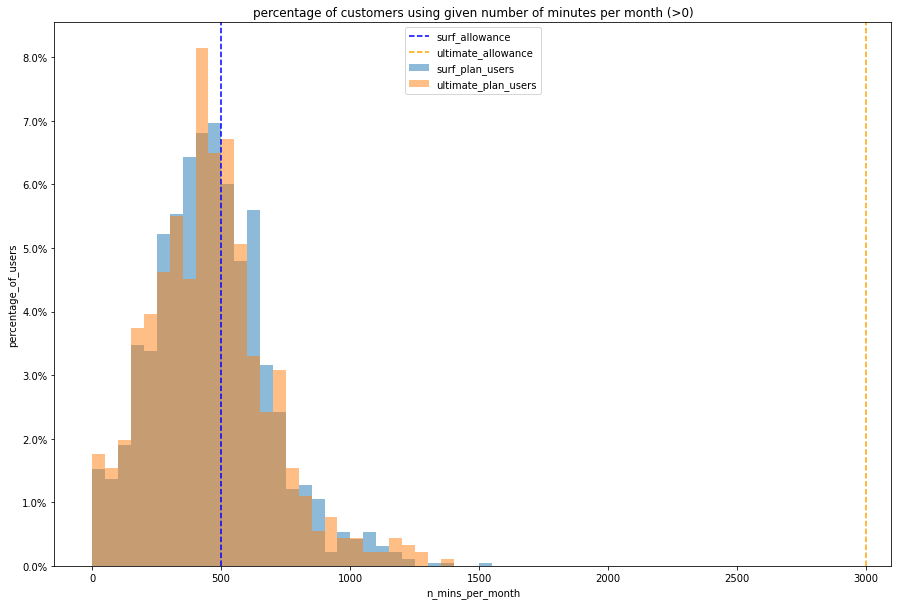

In [46]:
plt.figure(figsize=(15,10))
plt.hist(surf_mins_list_clean, weights= np.ones(len(surf_mins_list_clean)) / len(surf_mins_list_clean) , alpha = 0.5,bins= list(range(1,3001,50)), label='surf_plan_users')
plt.hist(ultimate_mins_list_clean, weights=np.ones(len(ultimate_mins_list_clean)) / len(ultimate_mins_list_clean) , alpha = 0.5, bins= list(range(1,3001,50)), label='ultimate_plan_users')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_mins_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers using given number of minutes per month (>0)')

plt.axvline(x = plan_allowance['surf']['mins'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axvline(x = plan_allowance['ultimate']['mins'], color = 'orange', linestyle='--', label = 'ultimate_allowance')


plt.legend(loc='best')



plt.show()

Interesting to note that almost all users come nowhere near to surpassing the ultimate allowance.

The data looks to be approxiamtely normally distributed without too many differences between the plan types.
We can check that by looking at the means and variances.

In [47]:
# Calculating the mean and the variance of the monthly call duration

s_mean = statistics.mean(surf_mins_list_clean)
s_var = statistics.variance(surf_mins_list_clean)

u_mean = statistics.mean(ultimate_mins_list_clean)
u_var = statistics.variance(ultimate_mins_list_clean)

print(f'Surf mean: {s_mean:.2f}, Surf variance: {s_var:.2f}')
print(f'Ultimate mean: {u_mean:.2f}, Ultimate variance: {u_var:.2f}')

Surf mean: 325.00, Surf variance: 78914.57
Ultimate mean: 316.77, Ultimate variance: 82422.17


This confirms what we saw above that the two plans have very similar means and variances.

<Figure size 432x288 with 0 Axes>

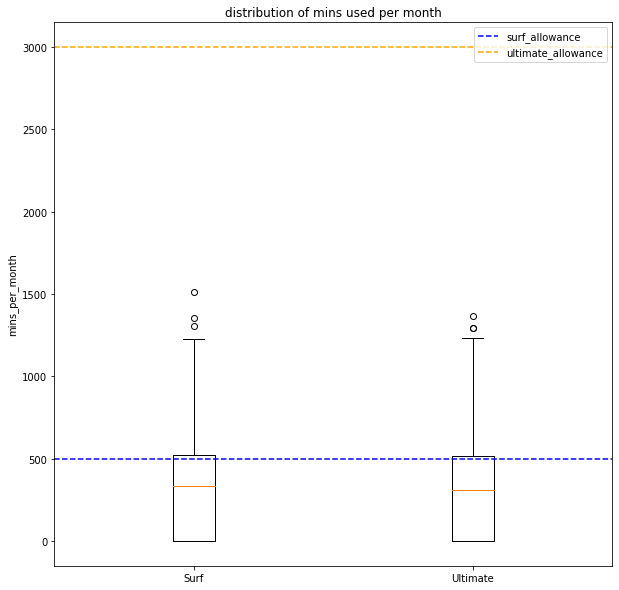

In [48]:
# Plotting a boxplot to visualize the distribution of the monthly call duration
plt.clf()

plt.figure(figsize=(10,10))

plt.boxplot([surf_mins_list_clean, ultimate_mins_list_clean], labels = ('Surf', 'Ultimate'))
plt.ylabel('mins_per_month')
plt.title('distribution of mins used per month')

plt.axhline(y = plan_allowance['surf']['mins'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axhline(y = plan_allowance['ultimate']['mins'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='upper right')

plt.show()

It appears that the calling behaviour of users of the Surf plan differs little from the behavious of Ultimate users.

Both sets ofof users calls last approximately the same length of time and when looking at the number of minutes used each month, the two datasets have very similar, means, medians, variances and IQRs.

### Messages

<Figure size 432x288 with 0 Axes>

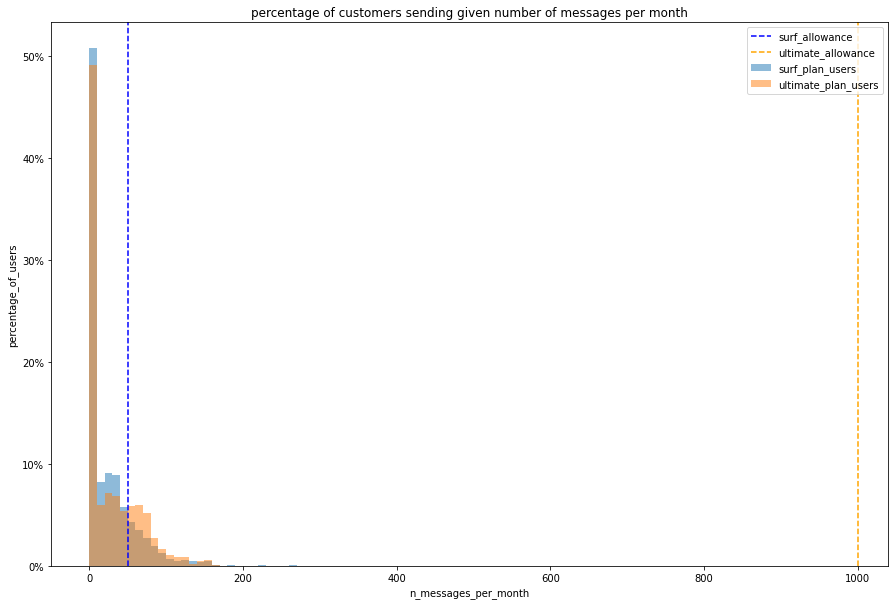

In [49]:
# Comparing the number of messages users of each plan tend to send each month
plt.clf()
surf_msgs_list_clean = clean_list(surf_df, 'n_messages')
ultimate_msgs_list_clean = clean_list(ultimate_df, 'n_messages')


plt.figure(figsize=(15,10))
#weights are added to get data as a percentage
plt.hist(surf_msgs_list_clean, weights= np.ones(len(surf_msgs_list_clean)) / len(surf_msgs_list_clean) , alpha = 0.5,bins= list(range(0,1000,10)), label='surf_plan_users')
plt.hist(ultimate_msgs_list_clean, weights=np.ones(len(ultimate_msgs_list_clean)) / len(ultimate_msgs_list_clean) , alpha = 0.5, bins= list(range(0,1000,10)), label='ultimate_plan_users')


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_messages_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers sending given number of messages per month')

plt.axvline(x = plan_allowance['surf']['msgs'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axvline(x = plan_allowance['ultimate']['msgs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')


plt.legend(loc='upper right')
plt.show()

An even greater percentage of users are sending zero messages a month, lets take a closer look at those sending at least one.

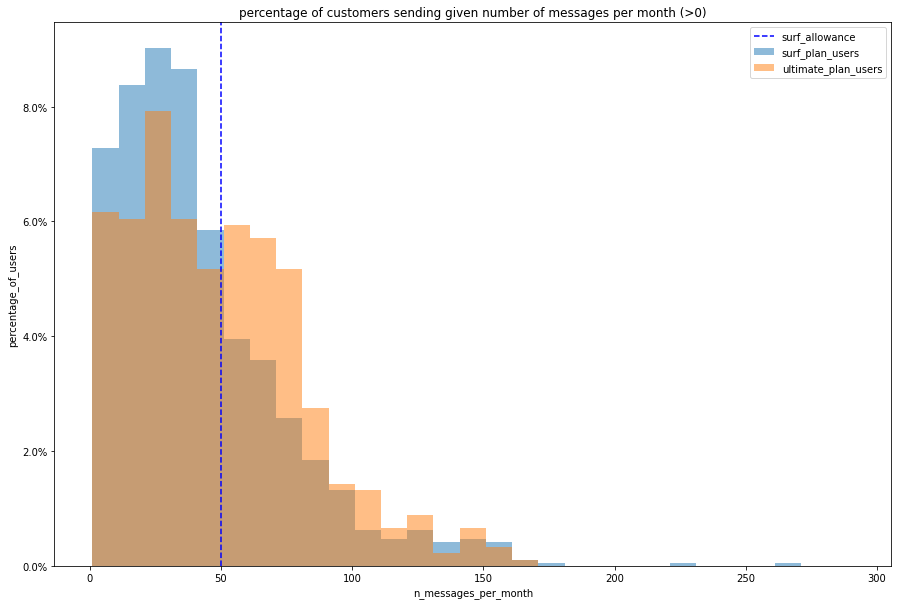

In [50]:
plt.figure(figsize=(15,10))
#weights are added to get data as a percentage
plt.hist(surf_msgs_list_clean, weights= np.ones(len(surf_msgs_list_clean)) / len(surf_msgs_list_clean) , alpha = 0.5,bins= list(range(1,301,10)), label='surf_plan_users')
plt.hist(ultimate_msgs_list_clean, weights=np.ones(len(ultimate_msgs_list_clean)) / len(ultimate_msgs_list_clean) , alpha = 0.5, bins= list(range(1,301,10)), label='ultimate_plan_users')


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_messages_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers sending given number of messages per month (>0)')

plt.axvline(x = plan_allowance['surf']['msgs'], color = 'b', linestyle='--', label = 'surf_allowance')
#plt.axvline(x = plan_allowance['ultimate']['msgs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='upper right')

plt.show()

In [51]:
#calculating means and variances

s_mean = statistics.mean(surf_msgs_list_clean)
s_var = statistics.variance(surf_msgs_list_clean)

u_mean = statistics.mean(ultimate_msgs_list_clean)
u_var = statistics.variance(ultimate_msgs_list_clean)

print(f'Surf mean: {s_mean:.2f}, Surf variance: {s_var:.2f}')
print(f'Ultimate mean: {u_mean:.2f}, Ultimate variance: {u_var:.2f}')

Surf mean: 23.44, Surf variance: 1061.85
Ultimate mean: 27.55, Ultimate variance: 1200.70


<Figure size 432x288 with 0 Axes>

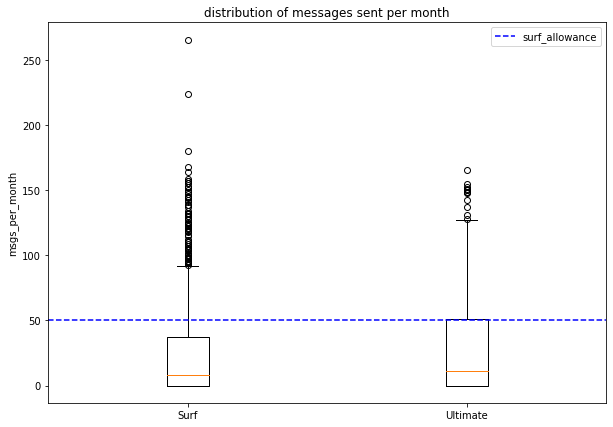

In [52]:
plt.clf()

plt.figure(figsize=(10,7))

plt.boxplot([surf_msgs_list_clean, ultimate_msgs_list_clean], labels = ('Surf', 'Ultimate'))
plt.ylabel('msgs_per_month')
plt.title('distribution of messages sent per month')

plt.axhline(y = plan_allowance['surf']['msgs'], color = 'b', linestyle='--', label = 'surf_allowance')
#plt.axhline(y = plan_allowance['ultimate']['msgs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='upper right')


plt.show()

Here we can see a slight difference, Ultimate plan users tend to send more messages per month and have a slightly higher variance in their behaviour.
Again we can see that no users are getting anywhere close to the Ultimate plan allowance.


### Internet

We can do what we have been doing above to analyse users internet usage.

<Figure size 432x288 with 0 Axes>

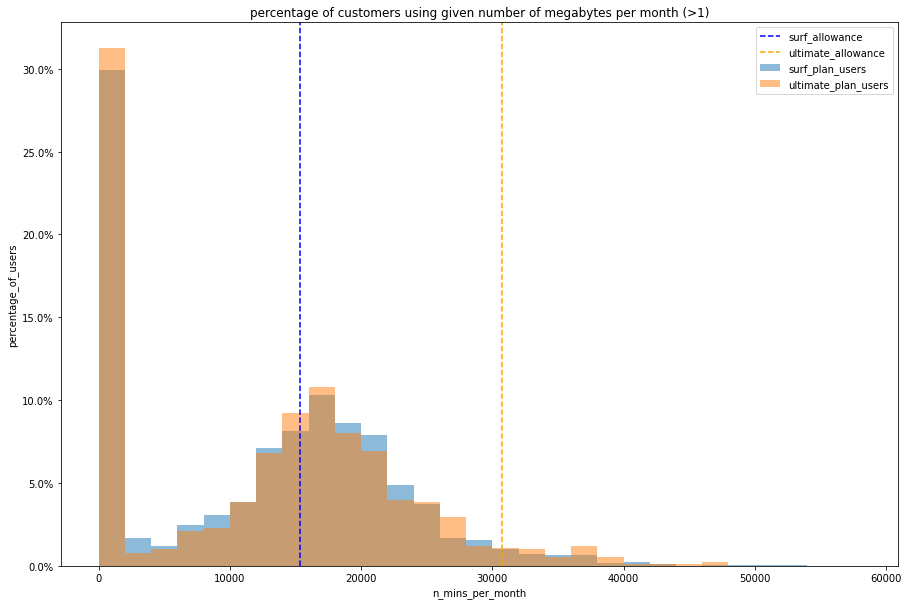

In [53]:
#plottng mbs used
plt.clf()
surf_data_list_clean = clean_list(surf_df, 'n_mbs')
ultimate_data_list_clean = clean_list(ultimate_df, 'n_mbs')

plt.figure(figsize=(15,10))
plt.hist(surf_data_list_clean, weights= np.ones(len(surf_data_list_clean)) / len(surf_data_list_clean) , alpha = 0.5,bins= list(range(0,60000,2000)), label='surf_plan_users')
plt.hist(ultimate_data_list_clean, weights=np.ones(len(ultimate_data_list_clean)) / len(ultimate_data_list_clean) , alpha = 0.5, bins= list(range(0,60000,2000)), label='ultimate_plan_users')


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_mins_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers using given number of megabytes per month (>1)')


plt.axvline(x = plan_allowance['surf']['mbs'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axvline(x = plan_allowance['ultimate']['mbs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='best')
plt.show()

Again, we see a number of users using 0 Mb we can look at those who used a non-zero amount of data.

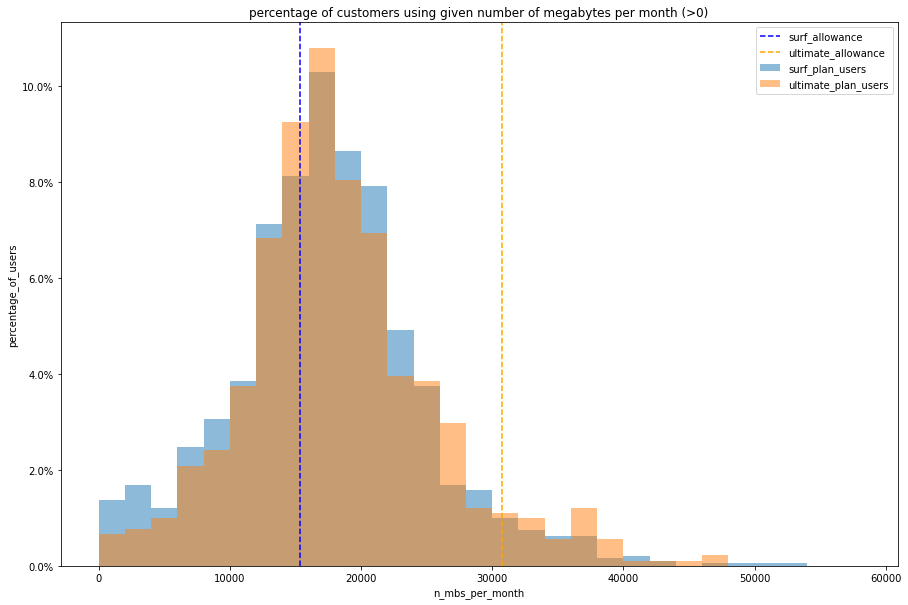

In [54]:
plt.figure(figsize=(15,10))
plt.hist(surf_data_list_clean, weights= np.ones(len(surf_data_list_clean)) / len(surf_data_list_clean) , alpha = 0.5,bins= list(range(1,60001,2000)), label='surf_plan_users')
plt.hist(ultimate_data_list_clean, weights=np.ones(len(ultimate_data_list_clean)) / len(ultimate_data_list_clean) , alpha = 0.5, bins= list(range(1,60001,2000)), label='ultimate_plan_users')


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('n_mbs_per_month')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers using given number of megabytes per month (>0)')

plt.axvline(x = plan_allowance['surf']['mbs'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axvline(x = plan_allowance['ultimate']['mbs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='best')
plt.show()

In [55]:
s_mean = statistics.mean(surf_data_list_clean)
s_var = statistics.variance(surf_data_list_clean)

u_mean = statistics.mean(ultimate_data_list_clean)
u_var = statistics.variance(ultimate_data_list_clean)

print(f'Surf mean: {s_mean:.2f}, Surf variance: {s_var:.2f}')
print(f'Ultimate mean: {u_mean:.2f}, Ultimate variance: {u_var:.2f}')

Surf mean: 12561.62, Surf variance: 104341347.49
Ultimate mean: 12714.18, Ultimate variance: 108994312.85


<Figure size 432x288 with 0 Axes>

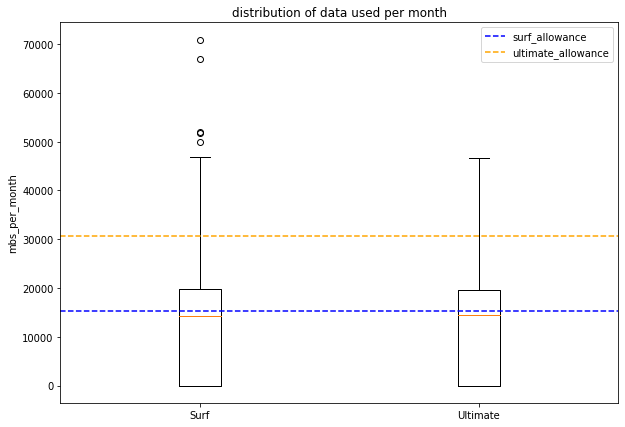

In [56]:
plt.clf()

plt.figure(figsize=(10,7))

plt.boxplot([surf_data_list_clean, ultimate_data_list_clean], labels = ('Surf', 'Ultimate'))
plt.ylabel('mbs_per_month')
plt.title('distribution of data used per month')

plt.axhline(y = plan_allowance['surf']['mbs'], color = 'b', linestyle='--', label = 'surf_allowance')
plt.axhline(y = plan_allowance['ultimate']['mbs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='upper right')


plt.show()

We can see two quite similar distributions in Mbs used, with a large number of Surf users using over their allowance, and a few users of both plans using more than the Ultimate allowance, with the top 5 monthly uses of data all being users on the Surf plan, although Ultimate users had a higher mean and variance.

As seen from the boxplot, nearly 50% of Surf users months exceeded the surf allowance, which could cause users of those plans to pay more than the ultimate cost for some months.

## Revenue


We can observe the differences in revenue between plans.

<Figure size 432x288 with 0 Axes>

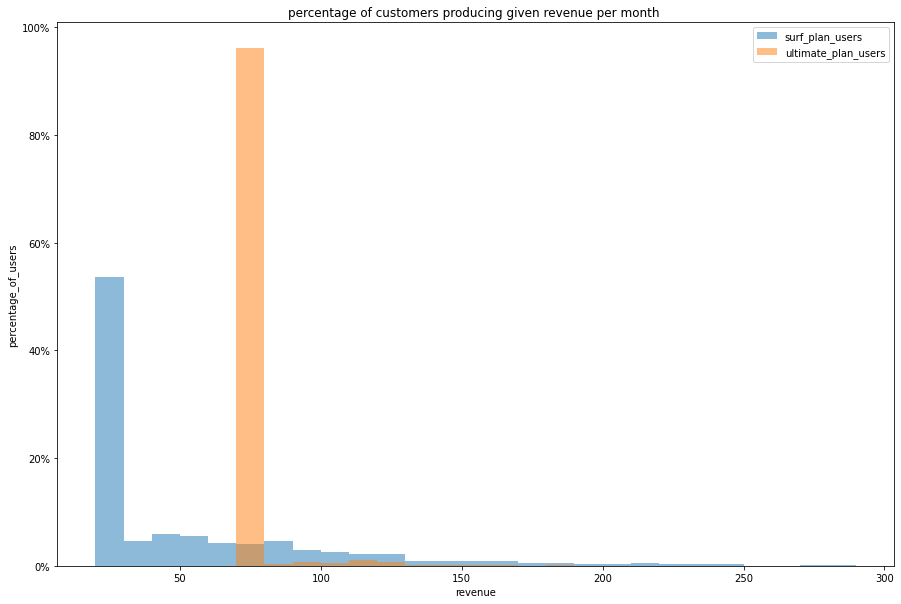

In [57]:
plt.clf()

surf_revenue_list_clean = clean_list(surf_df, 'revenue')
ultimate_revenue_list_clean = clean_list(ultimate_df, 'revenue')

plt.figure(figsize=(15,10))
plt.hist(surf_revenue_list_clean, weights= np.ones(len(surf_revenue_list_clean)) / len(surf_revenue_list_clean) , alpha = 0.5,bins= list(range(20,300,10)), label='surf_plan_users')
plt.hist(ultimate_revenue_list_clean, weights=np.ones(len(ultimate_revenue_list_clean)) / len(ultimate_revenue_list_clean) , alpha = 0.5, bins= list(range(20,300, 10)), label='ultimate_plan_users')


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('revenue')
plt.ylabel('percentage_of_users')
plt.title('percentage of customers producing given revenue per month ')
plt.legend(loc='best')
plt.show()

In [58]:
s_mean = statistics.mean(surf_revenue_list_clean)
s_var = statistics.variance(surf_revenue_list_clean)

u_mean = statistics.mean(ultimate_revenue_list_clean)
u_var = statistics.variance(ultimate_revenue_list_clean)

print(f'Surf mean: {s_mean:.2f}, Surf variance: {s_var:.2f}')
print(f'Ultimate mean: {u_mean:.2f}, Ultimate variance: {u_var:.2f}')

Surf mean: 52.03, Surf variance: 2749.53
Ultimate mean: 71.82, Ultimate variance: 103.54


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

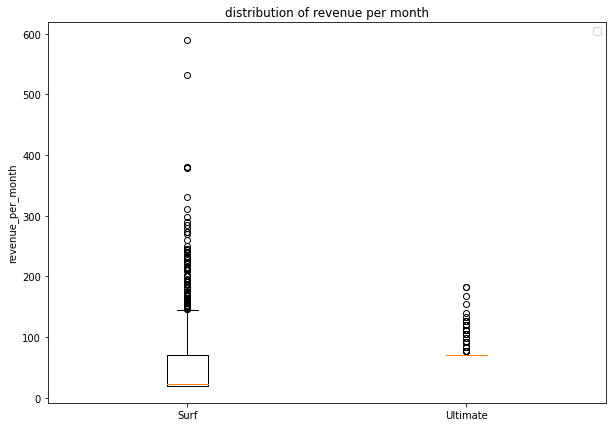

In [59]:
plt.clf()

plt.figure(figsize=(10,7))

plt.boxplot([surf_revenue_list_clean, ultimate_revenue_list_clean], labels = ('Surf', 'Ultimate'))
plt.ylabel('revenue_per_month')
plt.title('distribution of revenue per month')

#plt.axhline(y = plan_allowance['surf']['mbs'], color = 'b', linestyle='--', label = 'surf_allowance')
#plt.axhline(y = plan_allowance['ultimate']['mbs'], color = 'orange', linestyle='--', label = 'ultimate_allowance')

plt.legend(loc='upper right')


plt.show()


We can see that ~95% of the time, Ultimate users do not exceed their allowances and pay the basic cost of $70.
Only ~55% of the time do Surf users not exceed their allowances, and ~25% of the time their monthly cost exceeds that of the Ultimate plan.

The Ultimate mean revenue is much higher than the Surf mean ($72 vs 52) but the surf variance is ~27x higher. (103 vs 2750)

We can perform statistical test to confirm wether this difference in means is statistically significant. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

H0: The average revenue of Surf and Ultimate plan users does not differ

H1: The average revenue of Surf and Ultimate plan users does differ


We can perform a t-test to confirm whether this difference is statistically significant at the 0.05 level. 


We will set `equal_var` to `False` as the ratio in variances is ~27.

In [60]:
# Test the hypotheses
alpha = 0.05

results = st.ttest_ind(surf_revenue_list_clean, ultimate_revenue_list_clean, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.8940114289027935e-53
We reject the null hypothesis


We can see there is almost no chance that the difference in means was due to random chance, thus we can reject the null hypothesis and confirm that the average revenue of the Ultimate plan is different to that of the Surf plan

We are asked to test the hypothesis that average revenue form users from the NY-NJ area is different to that of users from other regions.

We can first separate the data into NY-NJ users and non-NY-NJ users then perform a t-test to check if the difference in their means is statistically significant.

In [61]:
for user in users_df['user_id'].unique():
    city = users_df.loc[users_df.user_id == user, 'city'].item()
    
    if 'NY-NJ' in city:
        agg_df.loc[agg_df.index == user, 'ny_nj'] =  1
    else:
        agg_df.loc[agg_df.index == user, 'ny_nj'] =  0

        
ny_nj_df = agg_df[agg_df['ny_nj'] == 1]
non_ny_nj_df = agg_df[agg_df['ny_nj'] == 0]


ny_nj_rev = clean_list(ny_nj_df, 'revenue')
non_ny_nj_rev = clean_list(non_ny_nj_df, 'revenue')



In [62]:
ny_nj_mean = statistics.mean(ny_nj_rev)
ny_nj_var = statistics.variance(ny_nj_rev)

non_ny_nj_mean = statistics.mean(non_ny_nj_rev)
non_ny_nj_var = statistics.variance(non_ny_nj_rev)

print(f'NY-NJ mean: {ny_nj_mean:.2f}, NY-NJ variance: {ny_nj_var:.2f}')
print(f'Non-NY-NJ mean: {non_ny_nj_mean:.2f}, Non-NY-NJ variance: {non_ny_nj_var:.2f}')

NY-NJ mean: 54.49, NY-NJ variance: 1712.18
Non-NY-NJ mean: 59.23, Non-NY-NJ variance: 2027.27


We can see that the means differ by ~$5 and both have similar variances. We can see if this difference is significant by performing a statistical test.

H0: The average revenue of users in NY-NJ area does not differ to users outside NY-NJ

H1: The average revenue of users in NY-NJ area does differ to users outside NY-NJ


We can perform a t-test to confirm whether this difference is statistically different at the 0.05 level. 


We will set `equal_var` to `True` as we don't have any reason to expect the characteristics of NY-NJ users to be different from other users.

In [63]:
alpha = 0.05

results = st.ttest_ind(ny_nj_rev, non_ny_nj_rev, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
    

p-value: 0.036017901362980706
We reject the null hypothesis


At the 0.05 significance level we reject our null hypothesis.

The average revenue of NY-NJ users is significantly different to non-NY-NJ users.

Interestingly we would have not rejected the null hypothesis at the 0.01 significance level.

## General conclusion


In order to effectively analyse which plan bought in more revenue, we had to take a number of steps:

- Fixing data and enriching data
- Aggregating data
- Analysing user behaviour
- Performing statistical tests

#### Fixing data and enriching data

In order to accurately measure monthly revenue, we took the decision to only look at *full months* that users were signed up to a plan. i.e They had signed up on or before the start of the month and if they left, had left on or after the last of the month. In order to do this we had to chnage date columns to datetime objects then look at the date and month attributes of these to determine the start and end months. We then added new columns to denote these.

#### Aggregating data

We used Multindexing to create a dataframe with each users usage and revenue per month. Using the datetime columns month attribute and groupby to collate data.

Calculating revenue meant referring to the plans parameters and for each month and each user, analysing whether they had excedded their allowance and if so, adding that amount to their basic cost.

#### Analysing user behaviour

We used data visualisations to analyse user behaviour across the two plans. 
For Calls, messages and data we noticed only small variations in behaviour, with most users not exceeding their monthly allowances each month. However a significant number of Surf users exceed their data allowance, causing an uptick in revenue.

#### Performing statistical tests

We were tasked with finding out whether the revenue was significantly different between the Surf plan and the Ultimate plan and we found that yes it was.
We formed a null and alternative hypothesis, conducted a t-test for independence and rejected the null hypothesis that the plans had the same revenue at the 0.05 level (we would have rejected at 0.01 signifcance level too.

The other hypothesis to test was that the users in the NY-NJ area had a different average revenue o those not form the NY-NJ area. Again we performed a t-test for independence and found that this was case as we rejected the null hypothesis at the 0.05 significance level (although we wouldn't have rejected at 0.01 level).

